In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel('/Users/tarique/Documents/Github/TimeSeries/myntrasales.xlsx')
df.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


<Axes: xlabel='DATE'>

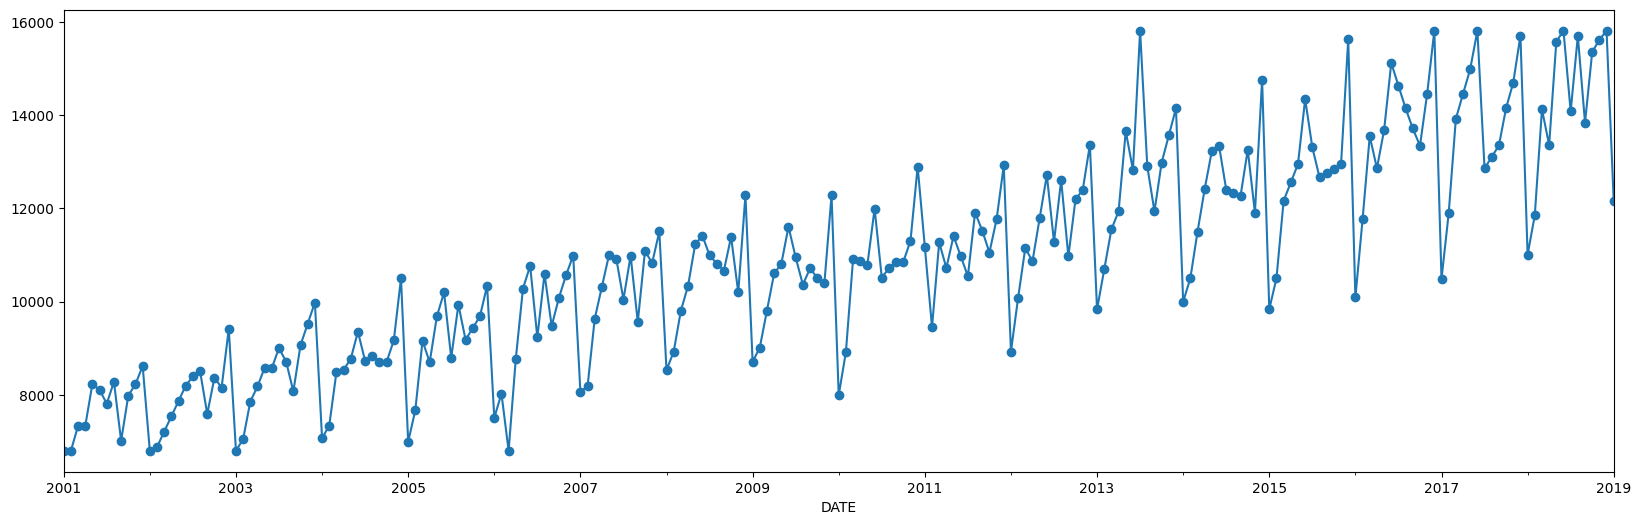

In [10]:
df.set_index('DATE',inplace=True)
df.Sales = df.Sales.interpolate(method='linear')
df.Sales = df.Sales.clip(upper = df.Sales.quantile(0.98),lower = df.Sales.quantile(0.02))
df.Sales.plot(style='-o',figsize=(20,6))


In [11]:
import statsmodels.api as sm 

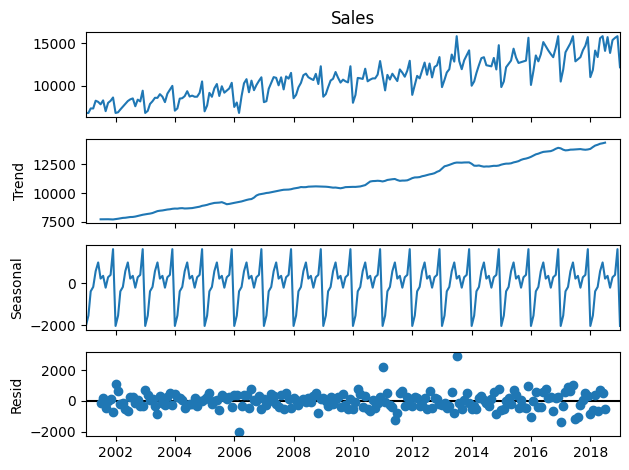

In [67]:
#Following code gives you data trend seasonality,residuals  plot
model = sm.tsa.seasonal_decompose(df.Sales,model = 'additive')
model.plot()
plt.show()


<Axes: xlabel='DATE'>

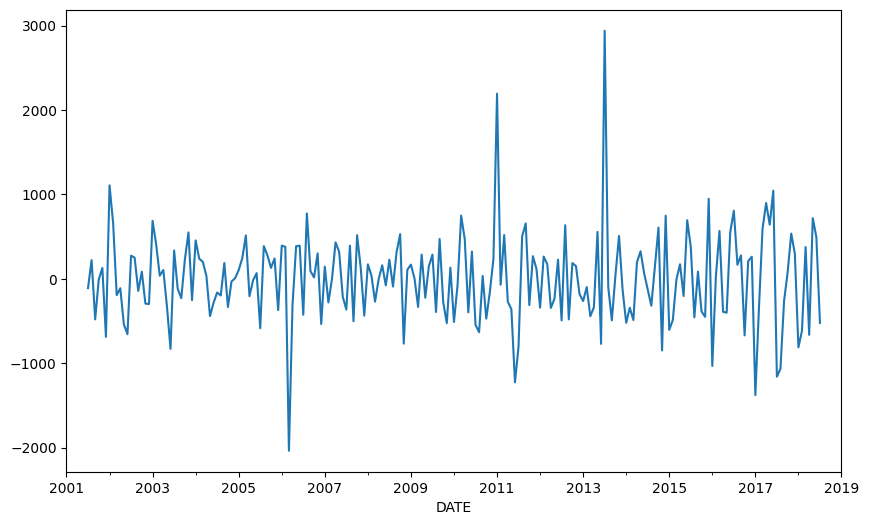

In [68]:
model.resid.plot(figsize=(10,6))

[]

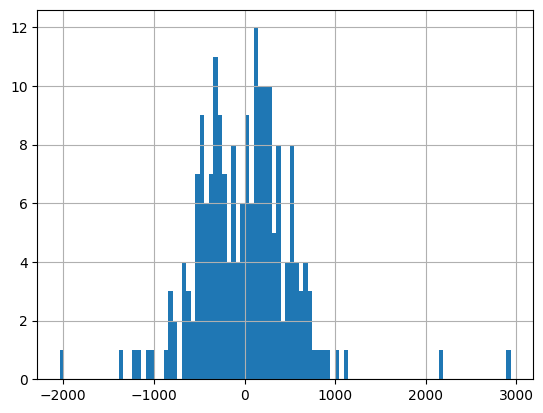

In [69]:
model.resid.hist(bins=100).plot(figsize = (10,6))

In [16]:
model.resid.mean()

np.float64(-3.2316417029769227)

In [17]:
df.tail()

,Sales
DATE,
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0
2018-12-01,15809.4
2019-01-01,12160.0


In [18]:
df.index[-12]

Timestamp('2018-02-01 00:00:00')

In [19]:
train_x = df[df.index<df.index[-12]]
test_x = df[df.index>=df.index[-12]]

In [20]:
test_x

,Sales
DATE,
2018-02-01,11852.0
2018-03-01,14123.0
2018-04-01,13360.0
2018-05-01,15576.0
2018-06-01,15809.4
2018-07-01,14080.0
2018-08-01,15697.0
2018-09-01,13838.0
2018-10-01,15351.0


In [21]:
from sklearn.metrics import mean_absolute_percentage_error as mape,mean_absolute_error as mae,mean_squared_error as mse

In [26]:
def performance(actual,predicted):
    print('MAPE: ',round(mape(actual,predicted),3))
    print('MAE: ',round(mae(actual,predicted)**0.5,3))
    print('MSE: ',round(mse(actual,predicted),3))
    
    

# Predictions
#### 1. Simple Forecast Method (mean)

MAPE:  0.255
MAE:  61.531
MSE:  16207919.765


/var/folders/8g/_rjsdyds0xx4615qq61z98mc0000gn/T/ipykernel_51117/184430282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = train_x.Sales.mean()


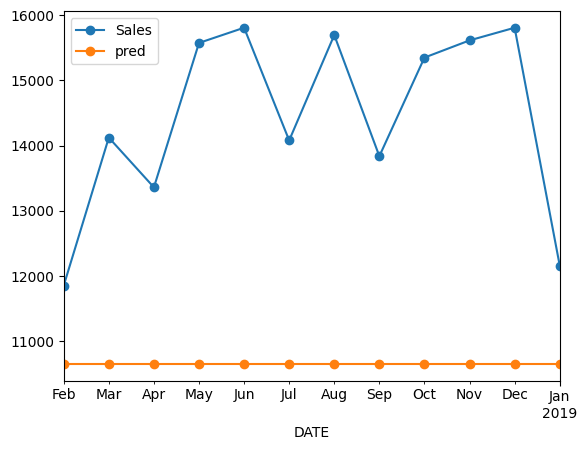

In [27]:
test_x['pred'] = train_x.Sales.mean()
test_x.plot(style='-o')
performance(test_x.Sales,test_x.pred)


#### 2. Naive Forecast Approach (Take Last Value as Prediction)

MAPE:  0.23
MAE:  58.602
MSE:  13667844.727


/var/folders/8g/_rjsdyds0xx4615qq61z98mc0000gn/T/ipykernel_51117/2570188280.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred'] = train_x.Sales[-1]
/var/folders/8g/_rjsdyds0xx4615qq61z98mc0000gn/T/ipykernel_51117/2570188280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = train_x.Sales[-1]


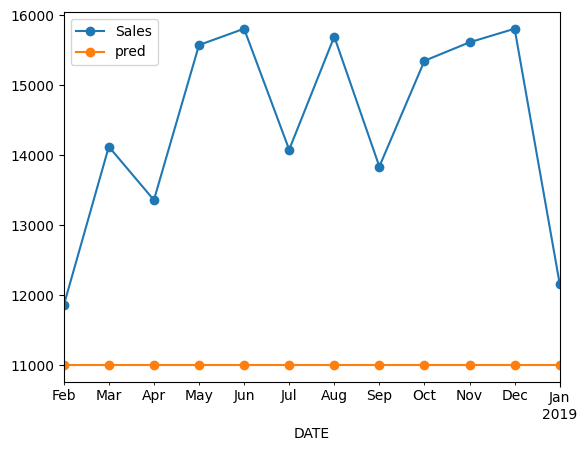

In [28]:
test_x['pred'] = train_x.Sales[-1]
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])

#### 3. Seasonal Naive Approach (Previous Season Values)

In [63]:
for i in test_x.index:
    test_x['pred'][i] = train_x.loc[i-pd.DateOffset(years=1)]['Sales']

/var/folders/8g/_rjsdyds0xx4615qq61z98mc0000gn/T/ipykernel_51117/4290010170.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test_x['pred'][i] = train_x.loc[i-pd.DateOffset(years=1)]['Sales']
/var/folders/8g/_rjsdyds0xx4615qq61z98mc0000gn

In [64]:
test_x

,Sales,pred
DATE,,
2018-02-01,11852.0,11891.0
2018-03-01,14123.0,13921.0
2018-04-01,13360.0,14453.5
2018-05-01,15576.0,14986.0
2018-06-01,15809.4,15809.4
2018-07-01,14080.0,12856.0
2018-08-01,15697.0,13102.5
2018-09-01,13838.0,13349.0
2018-10-01,15351.0,14150.0


MAPE:  0.055
MAE:  28.3
MSE:  1140276.555


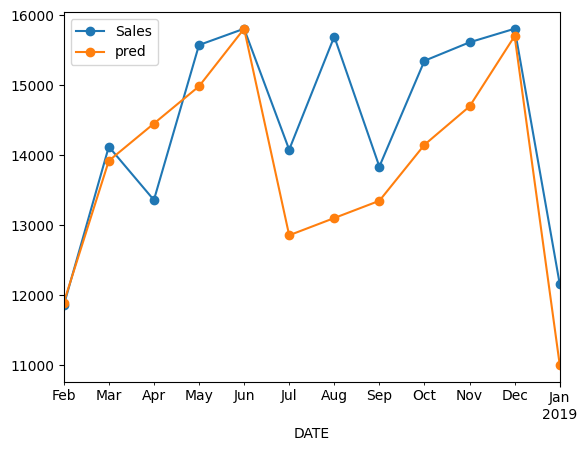

In [65]:
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])

In [60]:
test_x

,Sales,pred
DATE,,
2018-02-01,11852.0,11005.0
2018-03-01,14123.0,11005.0
2018-04-01,13360.0,11005.0
2018-05-01,15576.0,11005.0
2018-06-01,15809.4,11005.0
2018-07-01,14080.0,11005.0
2018-08-01,15697.0,11005.0
2018-09-01,13838.0,11005.0
2018-10-01,15351.0,11005.0


In [216]:
df1 = df.copy()
df

,Sales
DATE,
2001-01-01,6802.44
2001-02-01,6802.44
2001-03-01,7332.00
2001-04-01,7332.00
2001-05-01,8240.00
...,...
2017-09-01,13349.00
2017-10-01,14150.00
2017-11-01,14698.00


# Prediction with moving average
##### MS -> Month Start

In [217]:
df1 = pd.concat([df1,pd.DataFrame(index = pd.date_range(start = df1.index[-1]+ pd.offsets.MonthBegin(1),periods=12,freq='MS'))])


In [218]:
pred = list(df1.Sales.values)
pred

[np.float64(6802.44),
 np.float64(6802.44),
 np.float64(7332.0),
 np.float64(7332.0),
 np.float64(8240.0),
 np.float64(8104.0),
 np.float64(7813.0),
 np.float64(8279.0),
 np.float64(7014.0),
 np.float64(7985.0),
 np.float64(8229.0),
 np.float64(8618.0),
 np.float64(6802.44),
 np.float64(6882.0),
 np.float64(7211.0),
 np.float64(7540.0),
 np.float64(7869.0),
 np.float64(8198.0),
 np.float64(8396.0),
 np.float64(8510.0),
 np.float64(7589.0),
 np.float64(8366.0),
 np.float64(8156.0),
 np.float64(9415.0),
 np.float64(6802.44),
 np.float64(7048.0),
 np.float64(7856.0),
 np.float64(8181.0),
 np.float64(8581.0),
 np.float64(8573.0),
 np.float64(9008.0),
 np.float64(8708.0),
 np.float64(8074.0),
 np.float64(9068.0),
 np.float64(9524.5),
 np.float64(9981.0),
 np.float64(7071.0),
 np.float64(7339.0),
 np.float64(8483.0),
 np.float64(8536.0),
 np.float64(8774.0),
 np.float64(9355.0),
 np.float64(8728.0),
 np.float64(8835.0),
 np.float64(8701.0),
 np.float64(8709.0),
 np.float64(9170.0),
 np.float

In [219]:
predList = []
for i in range(len(pred)):
    if  np.isnan(pred[i]):
        start = i-3
        # print(pred[start:i])
        mean_value = np.mean(pred[start:i])
        print(i,start)
        pred[i] = mean_value
        predList.append(mean_value)
        print(pred[i])



205 202
13802.333333333334
206 203
13503.77777777778
207 204
12770.370370370372
208 205
13358.827160493829
209 206
13210.991769547327
210 207
13113.396433470509
211 208
13227.738454503888
212 209
13184.042219173907
213 210
13175.0590357161
214 211
13195.613236464631
215 212
13184.904830451545
216 213
13185.192367544092


In [220]:
df1

,Sales
2001-01-01,6802.44
2001-02-01,6802.44
2001-03-01,7332.00
2001-04-01,7332.00
2001-05-01,8240.00
...,...
2018-09-01,NaN
2018-10-01,NaN
2018-11-01,NaN
2018-12-01,NaN


In [221]:
predList

[np.float64(13802.333333333334),
 np.float64(13503.77777777778),
 np.float64(12770.370370370372),
 np.float64(13358.827160493829),
 np.float64(13210.991769547327),
 np.float64(13113.396433470509),
 np.float64(13227.738454503888),
 np.float64(13184.042219173907),
 np.float64(13175.0590357161),
 np.float64(13195.613236464631),
 np.float64(13184.904830451545),
 np.float64(13185.192367544092)]

In [222]:
df1['pred'] = np.nan

In [223]:
i = 0
for index,row in df1.iterrows():
    if np.isnan(row['Sales']):
        df1.loc[index,'pred'] = predList[i]
        i = i+1
        print(row['Sales'])



nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [224]:
df1

,Sales,pred
2001-01-01,6802.44,NaN
2001-02-01,6802.44,NaN
2001-03-01,7332.00,NaN
2001-04-01,7332.00,NaN
2001-05-01,8240.00,NaN
...,...,...
2018-09-01,NaN,13184.042219
2018-10-01,NaN,13175.059036
2018-11-01,NaN,13195.613236
2018-12-01,NaN,13184.904830


<Axes: >

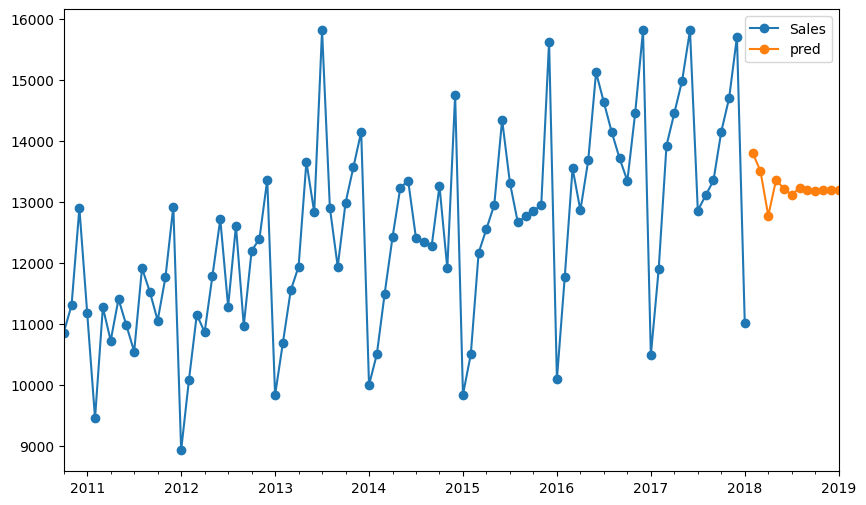

In [225]:
df1.tail(100).plot(style='-o',figsize=(10,6))

In [226]:
df = train_x.copy()

In [227]:
test_x

,Sales,pred
DATE,,
2018-02-01,11852.0,NaN
2018-03-01,14123.0,NaN
2018-04-01,13360.0,NaN
2018-05-01,15576.0,NaN
2018-06-01,15809.4,NaN
2018-07-01,14080.0,NaN
2018-08-01,15697.0,NaN
2018-09-01,13838.0,NaN
2018-10-01,15351.0,NaN


In [228]:
test_x['pred'] = df1.pred[-12:]

/var/folders/8g/_rjsdyds0xx4615qq61z98mc0000gn/T/ipykernel_51117/1027831548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = df1.pred[-12:]


In [229]:
test_x

,Sales,pred
DATE,,
2018-02-01,11852.0,13802.333333
2018-03-01,14123.0,13503.777778
2018-04-01,13360.0,12770.370370
2018-05-01,15576.0,13358.827160
2018-06-01,15809.4,13210.991770
2018-07-01,14080.0,13113.396433
2018-08-01,15697.0,13227.738455
2018-09-01,13838.0,13184.042219
2018-10-01,15351.0,13175.059036


MAPE:  0.115
MAE:  41.14
MSE:  3515738.466


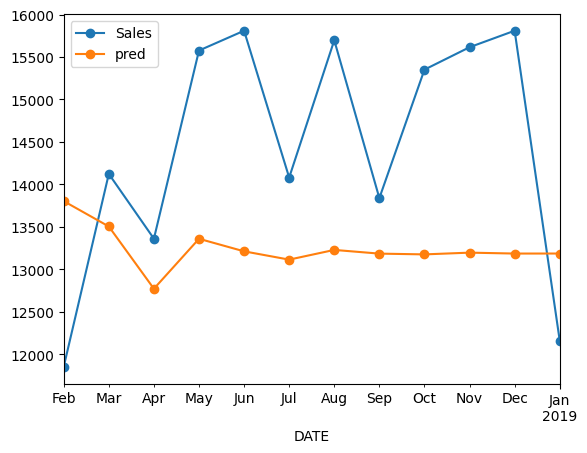

In [231]:
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])

In [235]:
model = pd.Series(sm.tsa.SimpleExpSmoothing(df.Sales).fit(smoothing_level=0.8).fittedvalues)

/Users/tarique/Documents/Github/TimeSeries/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/tarique/Documents/Github/TimeSeries/venv/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


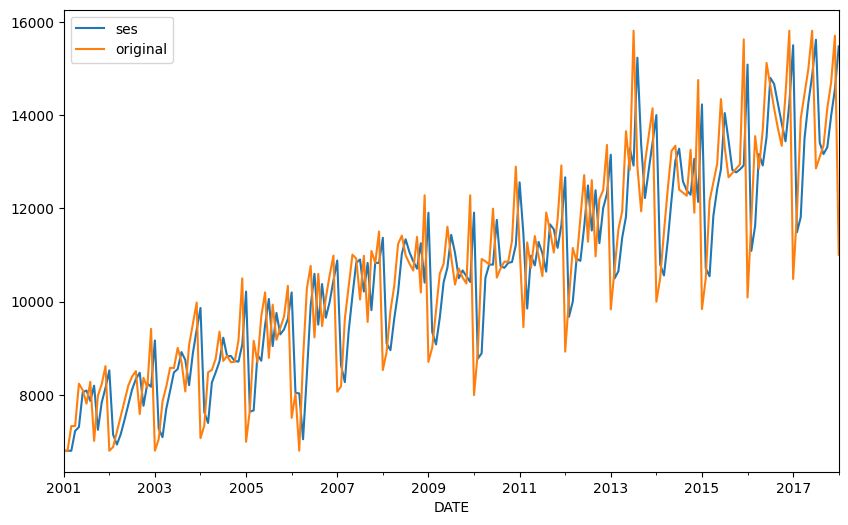

In [239]:
model.plot(label = 'ses',figsize = (10,6))
df.Sales.plot(label = 'original',figsize = (10,6))
plt.legend()
plt.show()


/Users/tarique/Documents/Github/TimeSeries/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/tarique/Documents/Github/TimeSeries/venv/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


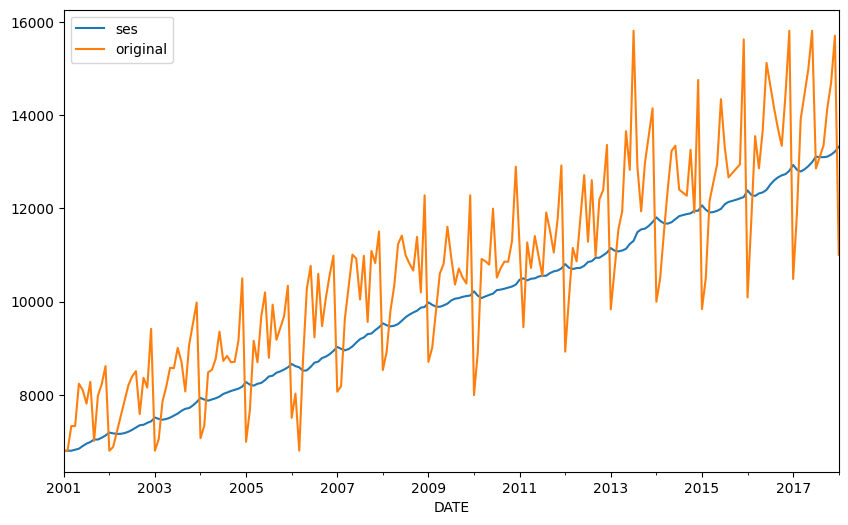

In [ ]:
model = pd.Series(sm.tsa.SimpleExpSmoothing(df.Sales).fit(smoothing_level=1/24).fittedvalues) #gives Trend
model.plot(label = 'ses',figsize = (10,6))
df.Sales.plot(label = 'original',figsize = (10,6))
plt.legend()
plt.show()